# Exploring the Data

Firstly the data is loaded into the dc to make it available for all future analysis.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import StrMethodFormatter
import datetime

from dataset_controller import DatasetController

games = pd.read_csv("Sources/games.csv", header=0, index_col=0)
dc = DatasetController("gamedata.hdf5", games)

vote_categories_palette = ['#BC4749', '#EE9B00', '#A7C957', '#4F772D']
games_palette = ['#D73833', '#16697A', '#ECA009']

First off it might be interesting to just get an overview of how many players each game has concurrently.

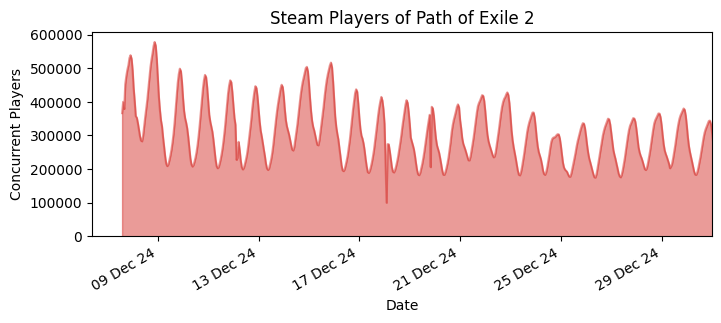

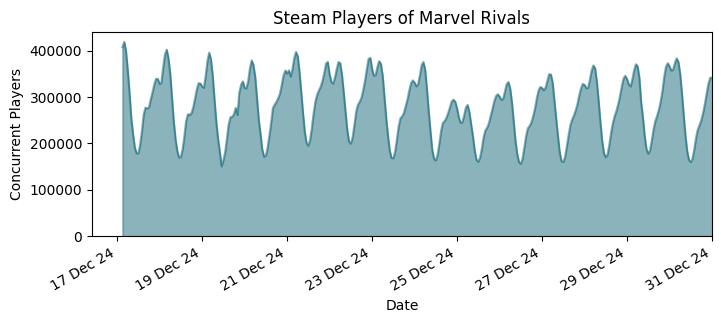

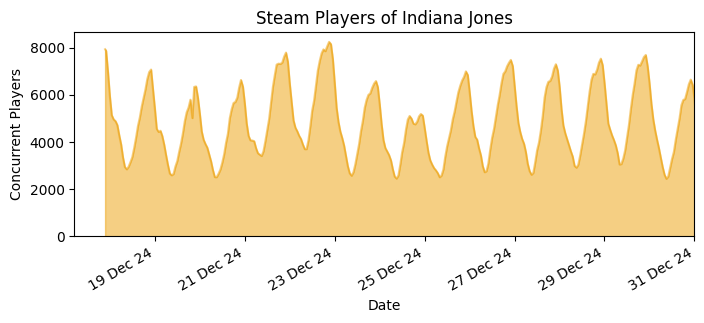

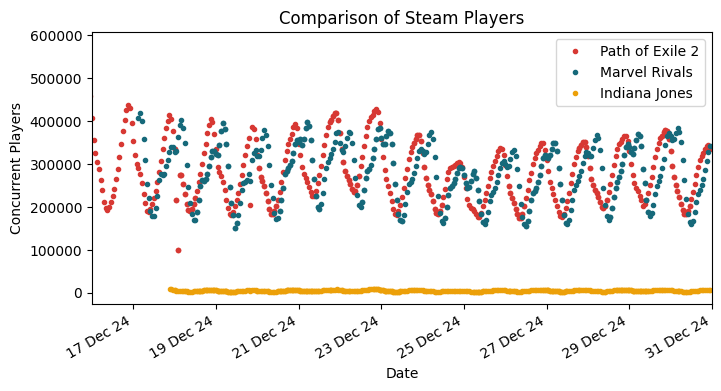

In [9]:
# Getting the player counts
dataset = dc.array_steam_counts()

def total_players_diagram(game, title, game_num):
        data = {'Logged': dataset["Logged On"], 'Players': dataset[game]}
        df = pd.DataFrame(data).dropna()

        df.plot(x='Logged', kind='area', stacked=False, color=games_palette[game_num], legend=None, figsize=(8,3))
        plt.title(title)
        plt.xlabel('Date')
        plt.ylabel('Concurrent Players')
        plt.xlim(None, datetime.datetime.strptime("2024-12-31", "%Y-%m-%d"))
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d %b %y"))
        plt.show()

total_players_diagram("Path of Exile 2", 'Steam Players of Path of Exile 2', 0)
total_players_diagram("Marvel Rivals", 'Steam Players of Marvel Rivals', 1)
total_players_diagram("Indiana Jones and the Great Circle", 'Steam Players of Indiana Jones', 2)


data = {'Logged': dataset["Logged On"],
        'Path of Exile 2': dataset["Path of Exile 2"],
        'Marvel Rivals': dataset["Marvel Rivals"],
        'Indiana Jones': dataset["Indiana Jones and the Great Circle"]
        }
df = pd.DataFrame(data)

# Plotting Area Plot
df.plot(x='Logged', kind='line', stacked=False, marker='o', linestyle="none", markersize=3, color=games_palette, figsize=(8,4))
plt.xlim(datetime.datetime.strptime("2024-12-16", "%Y-%m-%d"), datetime.datetime.strptime("2024-12-31", "%Y-%m-%d"))
plt.title('Comparison of Steam Players')
plt.xlabel('Date')
plt.ylabel('Concurrent Players')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d %b %y"))
plt.show()

#dataset["Logged On"].transform(lambda x: x.strftime("%a, %d %b")

## Different Games, Different Players

Different people are interested in different games, so an analysis of when people are playing might also be quite interesting. For this I chose the 18th of December as my day of comparison:


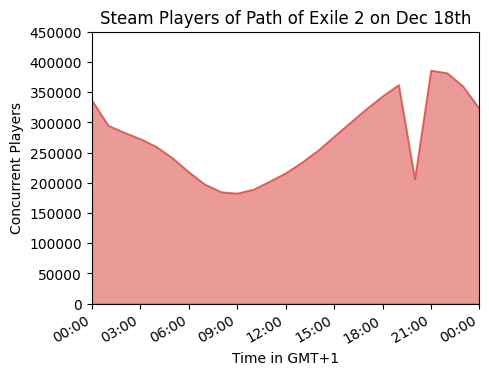

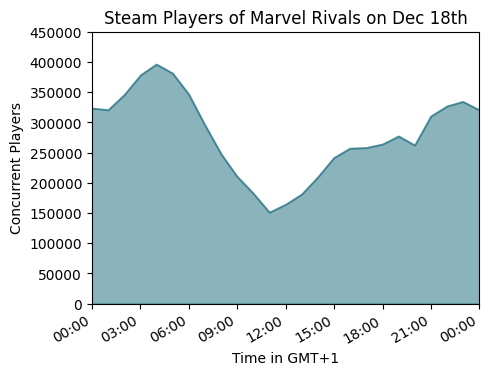

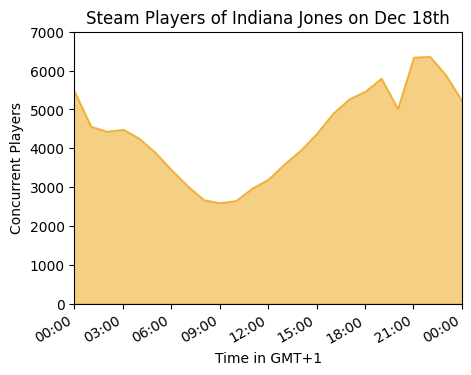

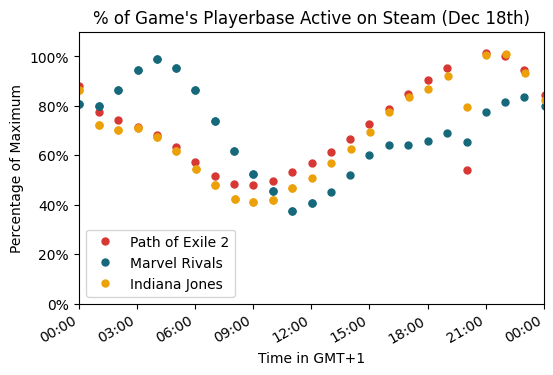

In [10]:
def one_day_diagram(game, title, game_num, ylim):
        data = {'Logged': dataset["Logged On"], 'Players': dataset[game]}
        df = pd.DataFrame(data).dropna()
        df.plot(x='Logged', kind='area', stacked=False, color=games_palette[game_num], legend=None, figsize=(5,4))
        plt.xlim(datetime.datetime.strptime("2024-12-19", "%Y-%m-%d"), datetime.datetime.strptime("2024-12-20", "%Y-%m-%d"))
        plt.title(title)
        plt.xlabel('Time in GMT+1')
        plt.ylabel('Concurrent Players')
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
        plt.ylim(None, ylim)
        plt.show()

one_day_diagram("Path of Exile 2", 'Steam Players of Path of Exile 2 on Dec 18th', 0, 450000)
one_day_diagram("Marvel Rivals", 'Steam Players of Marvel Rivals on Dec 18th', 1, 450000)
one_day_diagram("Indiana Jones and the Great Circle", 'Steam Players of Indiana Jones on Dec 18th', 2, 7000)

# Comparison Diagram

data = {'Logged': dataset["Logged On"],
        'Path of Exile 2': dataset["Path of Exile 2"].transform(lambda x: x/380000),
        'Marvel Rivals': dataset["Marvel Rivals"].transform(lambda x: x/400000),
        'Indiana Jones': dataset["Indiana Jones and the Great Circle"].transform(lambda x: x/6300)
        }
df = pd.DataFrame(data)
df.plot(x='Logged', kind='line', stacked=False, marker='o', linestyle="none", markersize=5, color=games_palette, figsize=(6,4))
plt.xlim(datetime.datetime.strptime("2024-12-19", "%Y-%m-%d"), datetime.datetime.strptime("2024-12-20", "%Y-%m-%d"))
plt.title("% of Game's Playerbase Active on Steam (Dec 18th)")
plt.xlabel('Time in GMT+1')
plt.ylabel('Percentage of Maximum')
plt.ylim(0,1.1)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0%}'))
plt.show()

## IGDB Results

The following are the aggregated results based on the data found on the IGDB website.

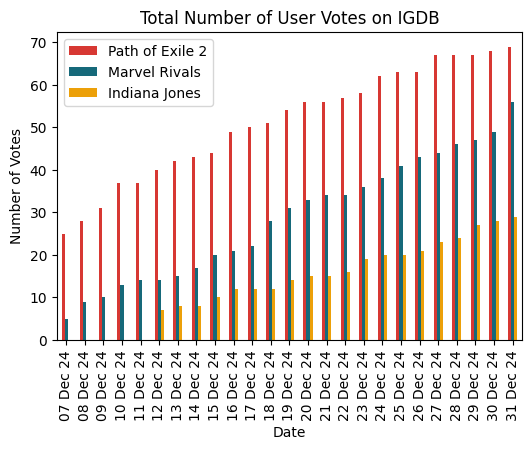

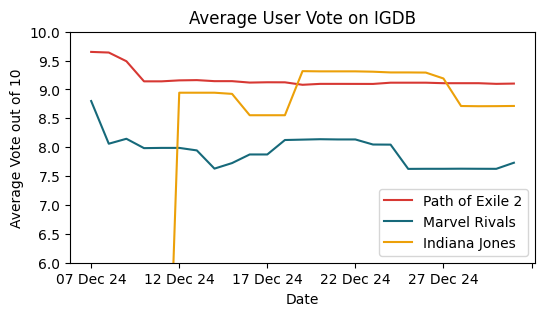

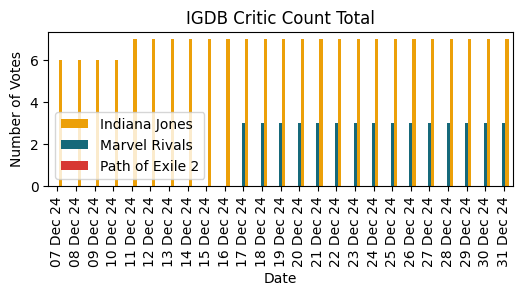

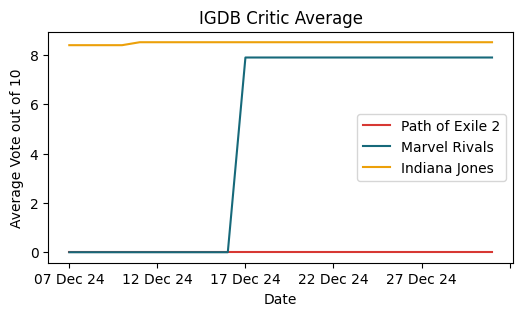

In [14]:
def get_igdb_dataframe(datalink):
        dataset = dc.get_dataset_daily(datalink)

        data = {'Logged': dataset["Logged On"].transform(lambda x: x.strftime("%d %b %y")),
                'Path of Exile 2': dataset["Path of Exile 2"],
                'Marvel Rivals': dataset["Marvel Rivals"],
                'Indiana Jones': dataset["Indiana Jones and the Great Circle"]
                }

        return pd.DataFrame(data)

df = get_igdb_dataframe("daily/user_votes/igdb")
df.plot(x='Logged', kind='bar', stacked=False, color=games_palette, figsize=(6,4))
plt.title('Total Number of User Votes on IGDB')
plt.xlabel('Date')
plt.ylabel('Number of Votes')
plt.show()

df = get_igdb_dataframe("daily/user_avg_rating/igdb")
df.plot(x='Logged', kind='line', stacked=False, color=games_palette, figsize=(6,3))
plt.title('Average User Vote on IGDB')
plt.ylim(6,10)
plt.xlabel('Date')
plt.ylabel('Average Vote out of 10')
plt.show()

df = get_igdb_dataframe("daily/critic_votes/igdb")
df.plot(x='Logged', kind='bar', stacked=False, color=games_palette, figsize=(6,2))
plt.title('IGDB Critic Count Total')
plt.xlabel('Date')
plt.ylabel('Number of Votes')
plt.legend(loc='lower left', reverse=True)
plt.show()

df = get_igdb_dataframe("daily/critic_avg_rating/igdb")
df.plot(x='Logged', kind='line', stacked=False, color=games_palette, figsize=(6,3))
plt.title('IGDB Critic Average')
plt.xlabel('Date')
plt.ylabel('Average Vote out of 10')
plt.show()


## Results from the RAWG Database

On the RAWG platform rather than giving a numerical rating, users vote based on four categories:
* Exceptional
* Recommended
* Meh
* Skip

All three games were available on the platform even ahead of time, which led to Path of Exile 2 receiving a number of votes ahead of release that didn't change all too much once the 6th of December came and went.

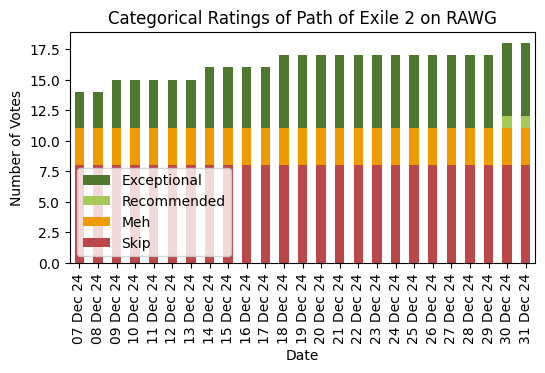

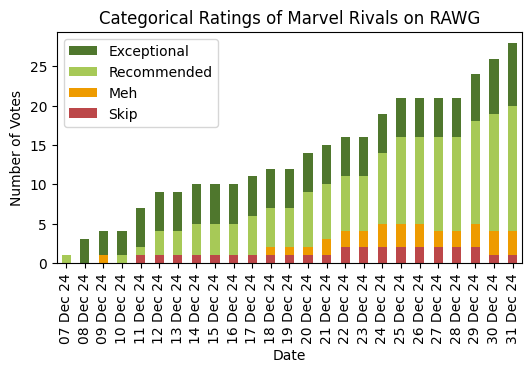

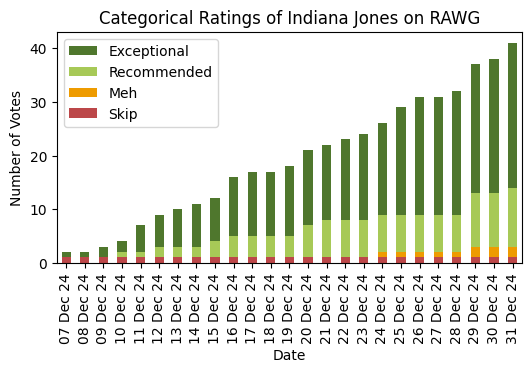

In [12]:
dataset = dc.get_dataset_daily("daily/user_cat_rating/rawg")

def rawg_user_diagram(game, title, legend_location):
        game_votes = []

        for log in dataset[game]:
            game_votes.append([int(votes) for votes in log.decode("utf-8").split(" ")])

        data = {'Logged': dataset["Logged On"].transform(lambda x: x.strftime("%d %b %y")),
                'Skip': pd.DataFrame(game_votes)[0],
                'Meh': pd.DataFrame(game_votes)[1],
                'Recommended': pd.DataFrame(game_votes)[2],
                'Exceptional': pd.DataFrame(game_votes)[3]
                }

        df = pd.DataFrame(data)
        df.plot(x='Logged', kind='bar', stacked=True, color=vote_categories_palette, figsize=(6,3))

        plt.title(title)
        plt.xlabel('Date')
        plt.ylabel('Number of Votes')
        plt.legend(loc=legend_location, reverse=True)
        plt.show()

rawg_user_diagram("Path of Exile 2", 'Categorical Ratings of Path of Exile 2 on RAWG', 'lower left')
rawg_user_diagram("Marvel Rivals", 'Categorical Ratings of Marvel Rivals on RAWG', 'upper left')
rawg_user_diagram("Indiana Jones and the Great Circle", 'Categorical Ratings of Indiana Jones on RAWG', 'upper left')

### Percentage of Total

Having the Total counts helps with an overall idea of the public's opinion, but it's difficult to compare the average view this way. Creating 100% bar charts might help with this.

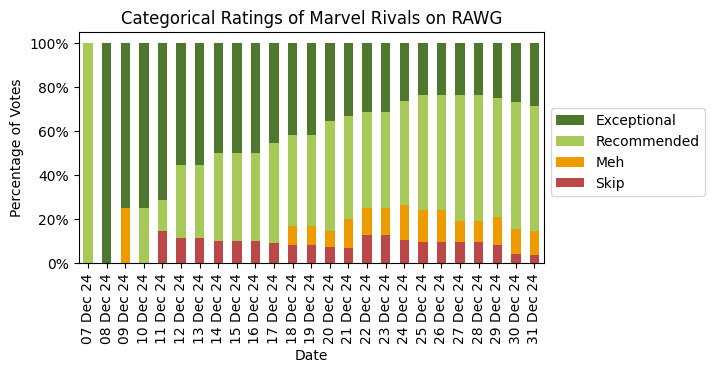

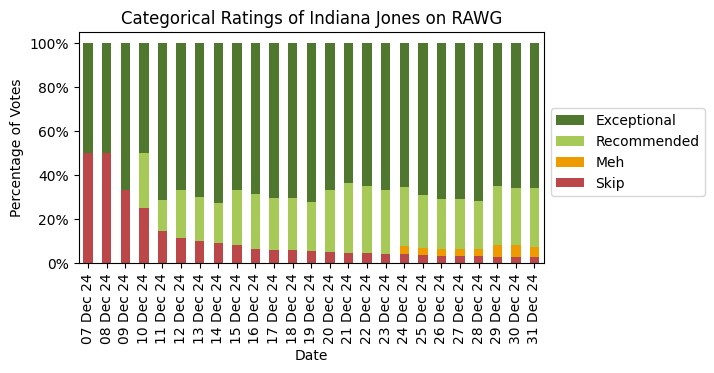

In [13]:
def rawg_user_percentages_diagram(game, title):
        game_votes = []

        for log in dataset[game]:
            game_votes.append([int(votes) for votes in log.decode("utf-8").split(" ")])

        data = {'Logged': dataset["Logged On"].transform(lambda x: x.strftime("%d %b %y")),
                'Skip': pd.DataFrame(game_votes)[0],
                'Meh': pd.DataFrame(game_votes)[1],
                'Recommended': pd.DataFrame(game_votes)[2],
                'Exceptional': pd.DataFrame(game_votes)[3]
                }

        df = pd.DataFrame(data)
        totals = [s+m+r+e for s,m,r,e in zip(df['Skip'], df['Meh'], df['Recommended'], df['Exceptional'])]

        data = {'Logged': dataset["Logged On"].transform(lambda x: x.strftime("%d %b %y")),
                'Skip': [i / j for i,j in zip(df['Skip'], totals)],
                'Meh': [i / j for i,j in zip(df['Meh'], totals)],
                'Recommended': [i / j for i,j in zip(df['Recommended'], totals)],
                'Exceptional': [i / j for i,j in zip(df['Exceptional'], totals)]
                }
        df = pd.DataFrame(data)

        df.plot(x='Logged', kind='bar', stacked=True, color=vote_categories_palette, figsize=(6,3))

        plt.title(title)
        plt.xlabel('Date')
        plt.ylabel('Percentage of Votes')
        plt.legend(loc='upper left', reverse=True, bbox_to_anchor=(1,0.7))
        plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.0%}'))
        plt.show()

rawg_user_percentages_diagram("Marvel Rivals", 'Categorical Ratings of Marvel Rivals on RAWG')
rawg_user_percentages_diagram("Indiana Jones and the Great Circle", 'Categorical Ratings of Indiana Jones on RAWG')
